In [ ]:
# colab 한글깨짐 해결위한 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 재시작 !

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

# 2. 분류형 선형모델

## 1. Logistic Regression

이름에 Regression이 들어가지만 회귀가 아닌 분류 모델임을 명심하자.

In [3]:
# 가상의 분류 데이터를 생성해 보자.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 100, n_features = 1, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1, n_classes=2,
                          random_state = 30)

- n_samples : data의 수, 기본값은 100
- n_features : feature의 수, 기본값은 20
- n_informative : 독립변수중 종속변수와 상관관계가 있는 성분의 수(y와 관련이 있는 x의 수), 기본값은 2
- n_redundant : 다른 독립변수들의 선형조합으로 만들어지는 독립변수의 수(다른 x들의 선형조합으로 만들어 지는 x의 수), 기본값은 2
- n_repeated : 중복되는 독립변수의 수, 기본값은 0, 독립변수란 입력값 X를 말한다.
- n_classes : 종속변수의 class 수, 기본값은 2
- n_clusters_per_class : 각 클래스당 클러스터 수, 기본값은 2, 클래스당 클러스터 수를 늘리게 되면 클래스 끼리 잘 분리되지 않은 상태의 데이터를 생성하게 된다., 주의 사항으로 n_classes * n_clusters_per_class는 2 ** n_informative보다 작거나 같게 설정해야 한다.
- random_state : 난수 발생, 난수값을 다르게하면 각자 다른 형태의 데이터가 나오게 된다.

In [4]:
X.shape
# 특성이 1인 데이터가 100개

(100, 1)

In [ ]:
X

In [ ]:
y

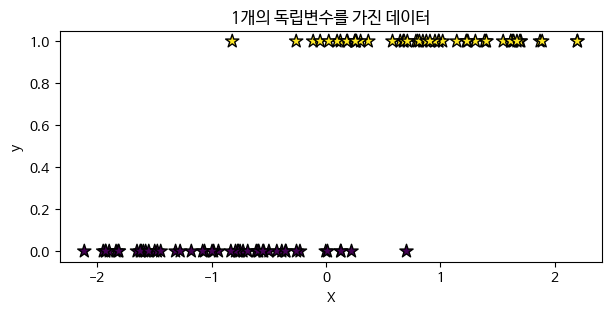

In [13]:
plt.figure(figsize = (7, 3))
plt.scatter(X, y, marker = '*', c = y, edgecolors = 'k', s = 100)
plt.title('1개의 독립변수를 가진 데이터')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
# 직접 생성한 데이터를 그래프로 그려보았다.

- title은 그래프의 제목을 넣어주는 명령어 이고 xlabel, ylabel은 각각 x축, y축의 이름을 설정할 수 있다.
- plt.scatter()의 파라미터 c는 마커의 색을 지정할 수 있다 ( ex) 여기서 사용한 c = y는 y의 값이 해당하는 데이터에 해당하는 색이 들어간다), edgecolors는 점의 테두리색 지정, s는 원의 크기지정, marker는 모양을 지정할 수 있다.

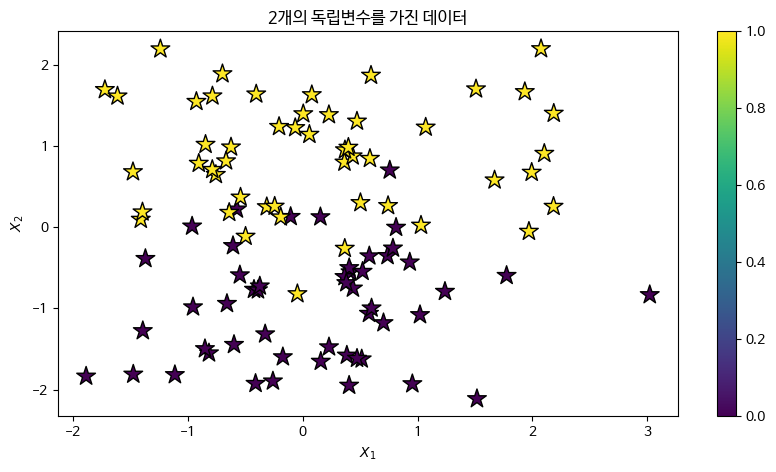

In [14]:
X, y = make_classification(n_samples = 100, n_features = 2, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1,
                          random_state = 30)
# 독립변수, 즉 n_features를 2로 설정한 데이터를 그래프로 그려보았다.
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, edgecolors = 'k', s = 200)
plt.title('2개의 독립변수를 가진 데이터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar()
plt.show()

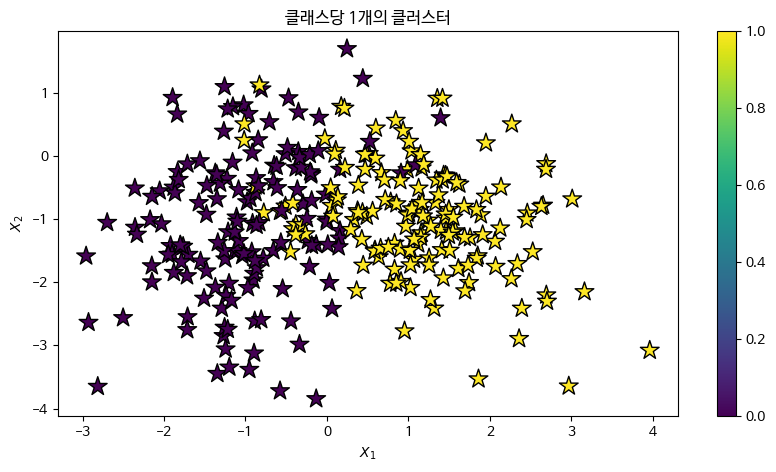

In [15]:
X1, y1 = make_classification(n_samples = 300, n_features = 2, n_informative = 2,
                            n_redundant = 0, n_clusters_per_class = 1,
                             random_state = 30)
# 클래스당 클러스터 수를 1로 설정해보고 그래프를 그려보았다.
plt.figure(figsize = (10, 5))
plt.scatter(X1[:, 0], X1[:, 1], marker = '*', c = y1, s = 200, edgecolors = 'k')
plt.title('클래스당 1개의 클러스터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar()
plt.show()

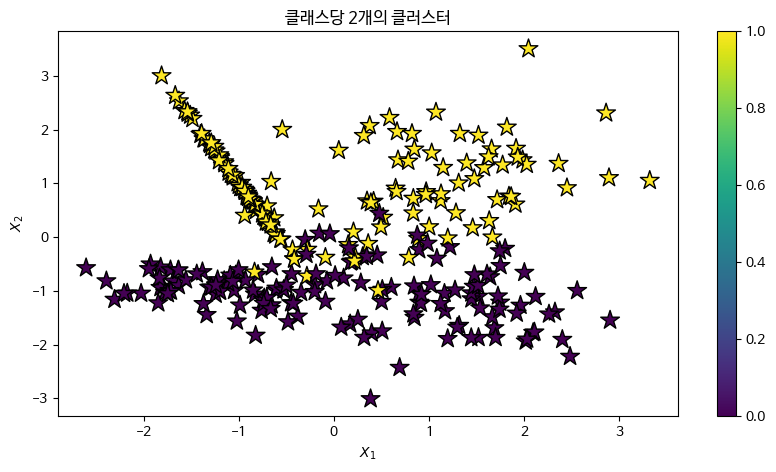

In [16]:
X1, y1 = make_classification(n_samples = 300, n_features = 2, n_informative = 2,
                            n_redundant = 0, n_clusters_per_class = 2,
                             random_state = 30)
# 클래스당 클러스터 수를 2로 설정해보고 그래프를 그려보았다.
plt.figure(figsize = (10, 5))
plt.scatter(X1[:, 0], X1[:, 1], marker = '*', c = y1, s = 200, edgecolors = 'k')
plt.title('클래스당 2개의 클러스터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar()
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples = 400, n_features = 1, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1,
                          random_state = 30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   shuffle = True)

# [123].sort()
model_logic = LogisticRegression().fit(X_train, y_train)

In [36]:
X_test.shape

(80, 1)

In [20]:
print('weight : {}\n\n'.format(model_logic.coef_))
print('bias : {}'.format(model_logic.intercept_))

weight : [[2.5919014]]


bias : [-0.01310004]


In [21]:
print('train score : {:.3f}\n\n'.format(model_logic.score(X_train, y_train)))
print('test score : {:.3f}'.format(model_logic.score(X_test, y_test)))

train score : 0.875


test score : 0.800


In [23]:
y_pred = model_logic.predict(X_test)
# predict로 예측할 수 있다.

In [25]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [24]:
y_test

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [29]:
import numpy as np
np.sum(y_test == y_pred) / len(y_test) # 정확도 accuracy

0.8

In [33]:
# 균일한 간격으로 데이터 생성
np.linspace(-4, 4, 50)

array([-4.        , -3.83673469, -3.67346939, -3.51020408, -3.34693878,
       -3.18367347, -3.02040816, -2.85714286, -2.69387755, -2.53061224,
       -2.36734694, -2.20408163, -2.04081633, -1.87755102, -1.71428571,
       -1.55102041, -1.3877551 , -1.2244898 , -1.06122449, -0.89795918,
       -0.73469388, -0.57142857, -0.40816327, -0.24489796, -0.08163265,
        0.08163265,  0.24489796,  0.40816327,  0.57142857,  0.73469388,
        0.89795918,  1.06122449,  1.2244898 ,  1.3877551 ,  1.55102041,
        1.71428571,  1.87755102,  2.04081633,  2.20408163,  2.36734694,
        2.53061224,  2.69387755,  2.85714286,  3.02040816,  3.18367347,
        3.34693878,  3.51020408,  3.67346939,  3.83673469,  4.        ])

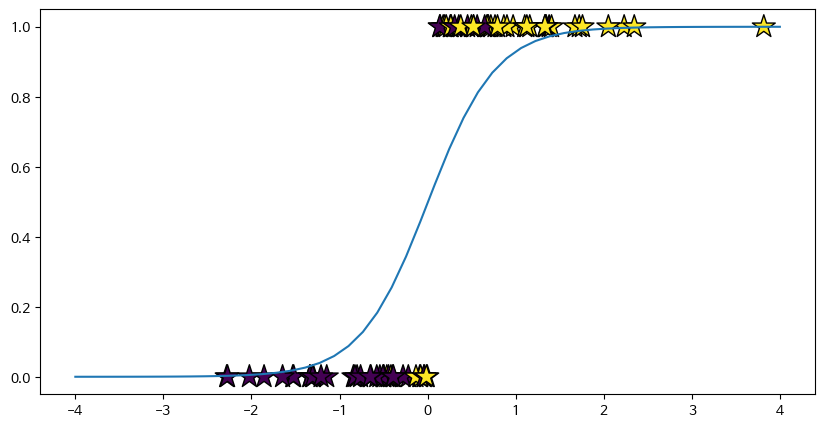

In [39]:
import numpy as np
plt.figure(figsize = (10,5))

dot_x = np.linspace(-4, 4, 50)
# -4 에서 4 까지 50개의 균일한 간격으로 나눈 점을 생성

log_func = 1.0/(1 + np.exp(-model_logic.coef_[0][0]*dot_x - model_logic.intercept_[0]))
# 로지스틱 함수

plt.plot(dot_x, log_func)
plt.scatter(X_test[:, 0], model_logic.predict(X_test), marker = '*', c = y_test,
            edgecolors = 'k', s = 300)

# X_test[:, 1]

plt.show()

In [40]:
dot_x.shape

(50,)

In [41]:
X, y = make_classification(n_samples = 100, n_features = 10, n_informative=1,
                          n_redundant = 3, n_clusters_per_class=1,
                          n_repeated = 0, random_state = 30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

In [42]:
X.shape
# n_samples 100 x n_features
# 특성이 여러개인 데이터셋도 만들어 볼 수 있다.

(100, 10)

In [ ]:
X[:, 0], X[:, 5]

### Logistic Regression의 regularization

In [43]:
LogisticRegression?

In [44]:
X, y = make_classification(n_samples = 100, n_features = 10,
                          n_clusters_per_class = 1,
                          random_state = 30,
                          n_redundant = 3,
                          n_informative = 1,
                          n_repeated = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    shuffle = True)

model_reg = LogisticRegression(penalty = 'l1', C=1.5, solver='saga').fit(X_train, y_train)
# pnealty로 l1과 l2를 지정할 수 있다. 기본값은 l2 이다.
# C로 규제강도를 정해줄 수 있다. 기본값은 1.0 이다.
# C의 값이 높아지면 규제가 감소하게 된다. 즉 C의 값을 높이면 데이터를 정확하게 분류하려고 한다.
# 너무 정확하게 분류하면 overfitting이 될 수 있으니 주의하자.

print('weight : \n{}\n\n'.format(model_reg.coef_))
print('bias : {}'.format(model_reg.intercept_))

weight : 
[[-0.65915353  1.16266282 -0.16444693  0.90768903  0.10003508 -0.68270325
   0.          0.          0.          3.12650937]]


bias : [0.04495401]


In [45]:
# 사이킷런에서 제공되는 유방암 데이터셋으로 실습해보자.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

b_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(b_cancer.data, b_cancer.target,
                                                   stratify = b_cancer.target ,
                                                    shuffle = True)
# stratify는 지정한 데이터의 비율을 유지한다. 유방암 데이터셋의 target의 0은 약 37%를 차지한다.
# 이 비율을 유지하며 데이터를 분할한다.


In [46]:
data_cancer = load_breast_cancer()
data_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(data_cancer['DESCR'])

In [50]:
data_cancer['data'].shape

(569, 30)

In [52]:
data_cancer['target'].shape

(569,)

In [54]:
set(data_cancer['target'])

{0, 1}

In [ ]:
data_cancer.data.shape, data_cancer.target.shape

1번. 데이터 수는?  
2번. feature의 수는?  
3번. 이 문제는 다중 클래스분류 문제인가?  
4번. 클래스의 수는?

1. 569개
2. 30개
3. X, 이진분류 문제
4. 2개


In [55]:
#1번 import 모델
from sklearn.linear_model import LogisticRegression

#2번, 3번 모델선택 & 모델.fit(학습데이터)
logistic_l2 = LogisticRegression().fit(X_train, y_train)

#4번 weight값 확인(생략)
#5번 검증 = 모델.score(학습데이터) / 모델.score(검증데이터)
print('train score : {:.3f}\n\n'.format(logistic_l2.score(X_train, y_train)))
print('test score : {:.3f}'.format(logistic_l2.score(X_test, y_test)))

train score : 0.944


test score : 0.951


train 과 test의 점수차이가 크지않다 C 값을 키워보자.

In [ ]:
LogisticRegression?

In [56]:
logistic_l2_10 = LogisticRegression(C = 10).fit(X_train, y_train)
print('train score : {:.3f}\n\n'.format(logistic_l2_10.score(X_train, y_train)))
print('test score : {:.3f}'.format(logistic_l2_10.score(X_test, y_test)))

train score : 0.948


test score : 0.951


In [ ]:
LogisticRegression?

train과 test 전부 점수가 증가했다.

In [57]:
logistic_l2_01 = LogisticRegression(C = 0.1).fit(X_train, y_train)
print('train score : {:.3f}\n\n'.format(logistic_l2_01.score(X_train, y_train)))
print('test score : {:.3f}'.format(logistic_l2_01.score(X_test, y_test)))

train score : 0.939


test score : 0.958


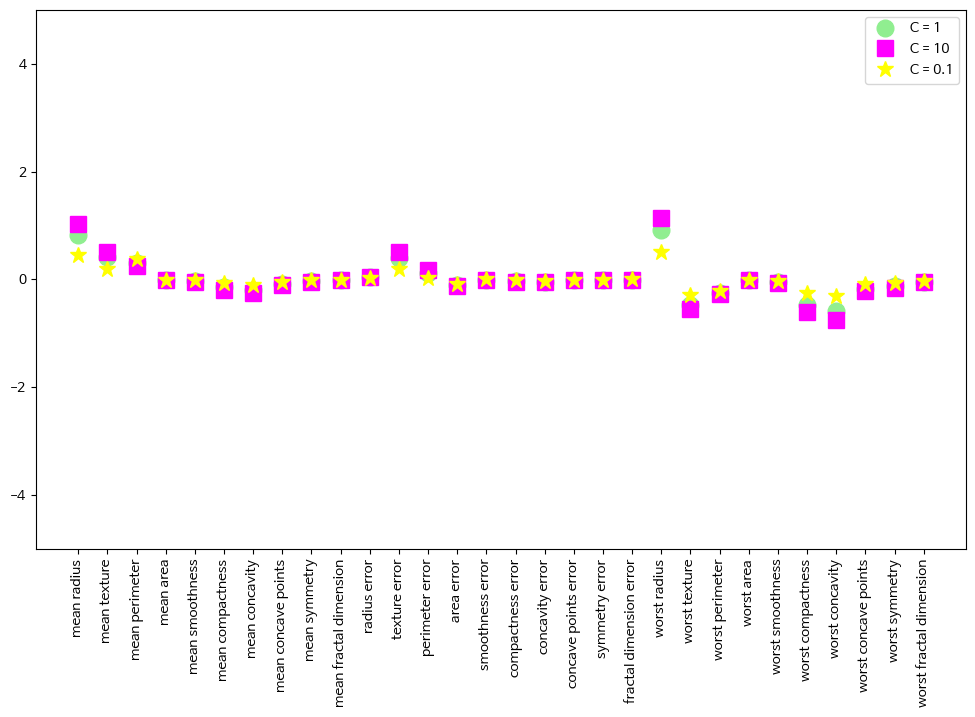

In [59]:
plt.figure(figsize = (12,7))
plt.plot(logistic_l2.coef_.T, 'o', label = 'C = 1', markersize = 12, c = 'lightgreen')
plt.plot(logistic_l2_10.coef_.T, 's', label = 'C = 10', markersize = 12, c = 'magenta')
plt.plot(logistic_l2_01.coef_.T, '*', label = 'C = 0.1', markersize = 12, c = 'yellow')
plt.xticks(range(b_cancer.data.shape[1]), b_cancer.feature_names, rotation = 90)
plt.ylim(-5, 5)
plt.legend()
plt.show()

이번엔 penalty를 L1을 이용해보자.

In [67]:
logistic_l1 = LogisticRegression(penalty = 'l1', solver='saga', C = 1.0).fit(X_train, y_train)
print('train score : {:.3f}\n\n'.format(logistic_l1.score(X_train, y_train)))
print('test score : {:.3f}'.format(logistic_l1.score(X_test, y_test)))

train score : 0.899


test score : 0.937


In [68]:
logistic_l1_01 = LogisticRegression(penalty = 'l1', solver='saga', C = 0.1).fit(X_train, y_train)
print('train score : {:.3f}\n\n'.format(logistic_l1_01.score(X_train, y_train)))
print('test score : {:.3f}'.format(logistic_l1_01.score(X_test, y_test)))

train score : 0.899


test score : 0.937


In [69]:
logistic_l1_10 = LogisticRegression(penalty = 'l1', solver='saga', C = 100).fit(X_train, y_train)
print('train score : {:.3f}\n\n'.format(logistic_l1_10.score(X_train, y_train)))
print('test score : {:.3f}'.format(logistic_l1_10.score(X_test, y_test)))

train score : 0.899


test score : 0.937


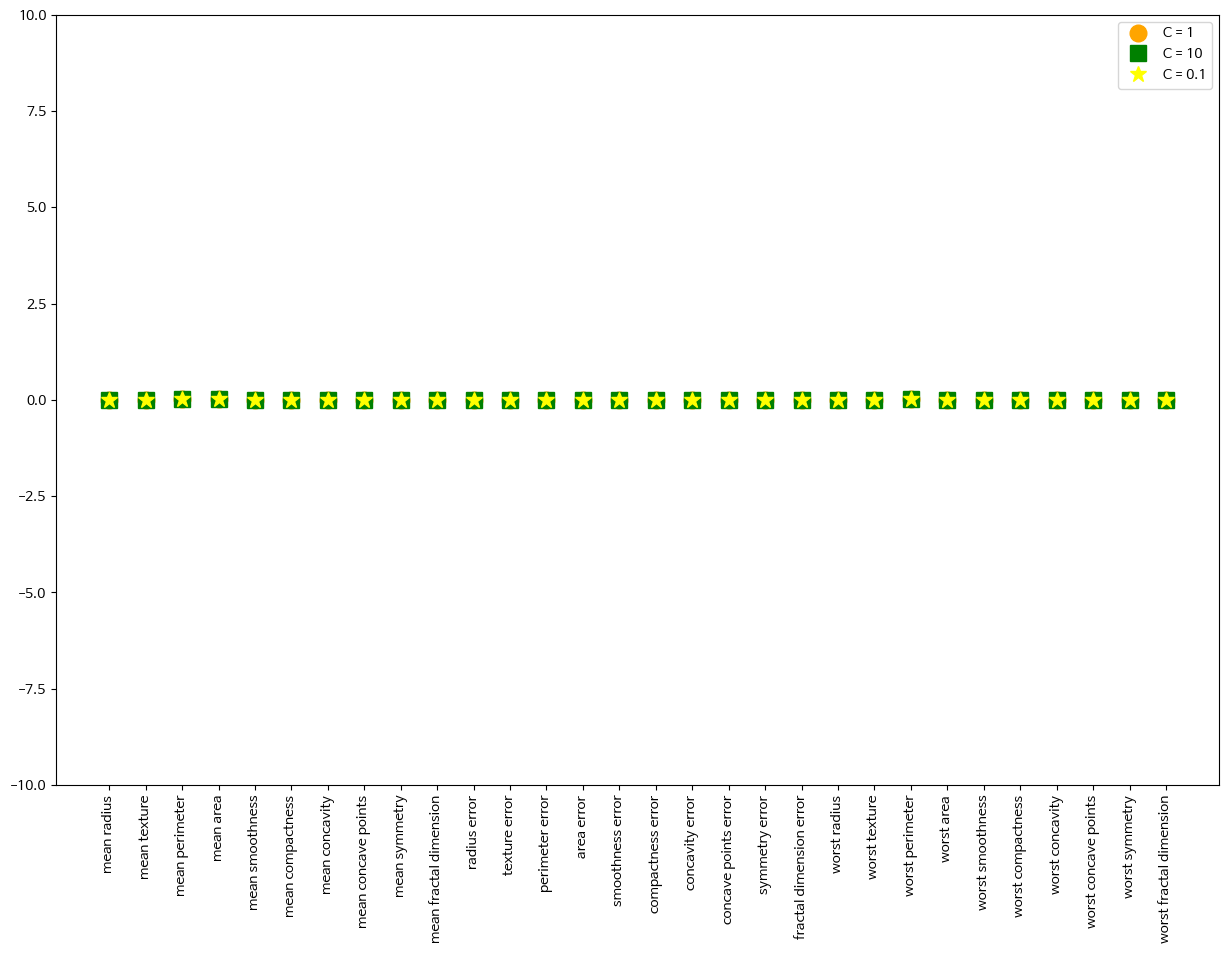

In [70]:
plt.figure(figsize = (15,10))
plt.plot(logistic_l1.coef_.T, 'o', label = 'C = 1', markersize = 12, c = 'orange')
plt.plot(logistic_l1_10.coef_.T, 's', label = 'C = 10', markersize = 12, c = 'green')
plt.plot(logistic_l1_01.coef_.T, '*', label = 'C = 0.1', markersize = 12, c = 'yellow')
plt.xticks(range(b_cancer.data.shape[1]), b_cancer.feature_names, rotation = 90)
plt.ylim(-10, 10)
plt.legend()
plt.show()

### Multinomial Classification

SoftMax Regression을 Multinomial Logistic Regression이라고도 한다.

이진분류 알고리즘을 다중 분류 알고리즘으로 확장하는 보편적인 방법은 일대다(one-vs-all)방법이다. 결국 클래스의 수만큼 이진분류 모델이 만들어지게 된다.
(LogisticRegression과 LinearSVC의 multi_class매개변수의 기본값이 'ovr'인데 일대다를 말한다.)

- 먼저 다중 클래스를 가진 가상 데이터를 만들어 보자.

In [71]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_features=3, n_redundant = 0,
                           n_classes=3, n_informative=3)

In [73]:
set(y)

# 0, 1, 2 3개의 클래스를 가지고 있다.

{0, 1, 2}

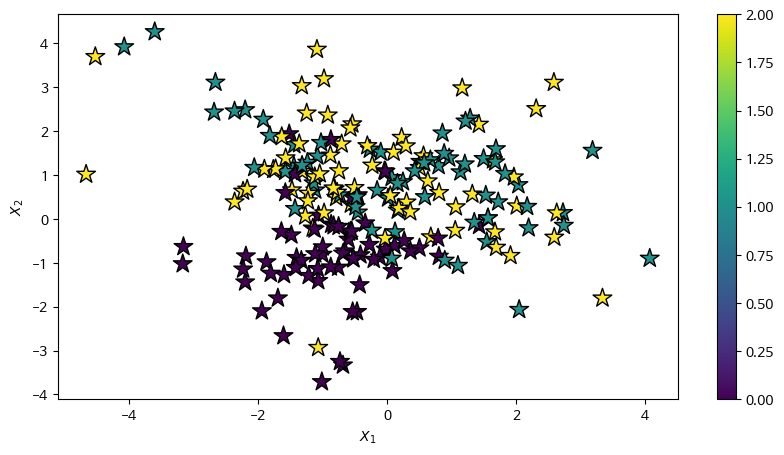

In [75]:
plt.figure(figsize = (10,5))
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, edgecolors = 'k', s = 200)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar()
plt.show()

In [76]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
np.__version__

In [ ]:
LogisticRegression?

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, shuffle=True)
multi_logistic = LogisticRegression(C= 0.5).fit(X_train, y_train)

# 밑에 뜨는 Warning은 0.22ver부터 multi_class매개변수를 지정하지 않으면 기본값이 ovr에서 auto로 바뀐다는 내용

In [79]:
print('X_test의 shape : {}\n\n'.format(X_test.shape))
print('y_test의 shape : {}'.format(y_test.shape))

X_test의 shape : (40, 3)


y_test의 shape : (40,)


데이터 개수는 40개 클래스의 수는 3개

In [80]:
# X_test를 이용해 예측을 해보자.

print('모델 예측 : \n{}'.format(multi_logistic.predict(X_test)))

모델 예측 : 
[0 1 1 0 2 0 0 0 2 0 2 0 2 2 2 1 2 1 0 0 0 0 0 2 2 0 0 2 1 0 2 2 2 0 2 1 1
 2 1 1]


In [82]:
y_pred = multi_logistic.predict(X_test)

In [81]:
print(y_test)

[0 1 1 0 2 0 0 0 2 0 2 0 2 2 2 1 2 1 0 0 0 0 2 2 2 0 0 2 1 0 2 2 2 0 2 1 1
 2 1 1]


In [84]:
np.sum(y_test == y_pred) / len(y_test)

0.975

- 예측해 본 결과

  1) 데이터 수 :  40개
  2) 카테고리(클래스) 수 : 0, 1, 2 (3개)

In [86]:
# predict_proba를 40개의 데이터의 클래스 확률을 확인할 수 있다.

y_pred_proba = multi_logistic.predict_proba(X_test)

In [94]:
y_pred_proba.shape

(40, 3)

In [100]:
# softmax
softmax_proba = np.exp(y_pred_proba) / np.sum(np.exp(y_pred_proba), axis=1).reshape(-1, 1)

In [101]:
softmax_proba.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [103]:
np.argmax(softmax_proba, axis=1)

array([0, 1, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1])

In [ ]:
np.sum(np.exp(y_pred_proba), axis=1).reshape(-1, 1)

지금까지 한 다중분류는 일대다 방식으로 다중분류 한 것이다.
Softmax로 다중분류를 하고 싶다면 어떻게 해야 할까?

- 사이킷런의 Logistic Regression은 기본적으로 클래스가 2개 이상이면 일대다 전략을 사용한다. 그러나 multi_class변수를 multinomial로 설정하게 되면 소프트맥스를 사용할 수 있다.

softmax를 지원하는 optimizer를 지정해줘야 한다.  
- 기본 optimizer : liblinear(softmax는 지원하지 않는다, 작은 데이터셋에서 유리하다)
- softmax를 지원 : cost 함수를 optimizing 해주는 모델이다.

1) lbfgs(limited memory bfgs) : l2규제만 지원해준다.

(부연설명 : 최적화의 결과는 시작점의 위치나 스텝 사이즈에 따라 달라진다. 그레디언트 벡터가 최저점을 가르키고 있지 않은 경우에는 진동이 발생하게 된다. 진동이 발생하게 되면 수렴하는데 오랜시간이 소요된다. 이러한 현상을 막기위해서 사용되는 방법으로 2가지가 있다.

gradient vector convergence

1. 2차 도함수 : 헤시안 행렬을 사용하는 방법으로 일반적으로 많이 사용된다.
2. 모멘텀(momentum): 2차 도함수 계산이 어려운 경우에 사용된다.

위의 2가지 방법이 있지만 여기에서는 2차 도함수에 대해서만 설명하도록 하겠다.

2차 도함수를 사용하는 뉴턴방법이있다. 뉴턴방법은 스텝사이즈가 필요가 없고 목적함수(object function)가 2차 함수와 비슷한 모양을 가진 경우에는 빠르게 수렴한다. 그러나 헤시안 행렬을 미리 구현해야 하는 수고로움과 함수의 모양에 따라서 수렴이 안되는 경우가 발생한다. 그래서 복잡한 헤시안 행렬을 사용하지 않는 방향으로 고안된게 준 뉴턴 방법이다. 준 뉴턴 방법은 시작점 주변의 몇몇개의 점들에게서 함수 값을 구하고 이를 이용하여 2차 도함수 근사치를 계산하는 방법이다. 준 뉴턴 방법에서는 L-BFGS가 많이 사용된다.)

- 헤시안행렬 -> 어떤 함수의 이계도함수를 행렬로 표시한 것.  
여기서 이계도함수의 예를 들면, 차량의 위치의 이계도함수는 시간에 관해 가속도. 즉, 속도의 변화량에 대한 함수를 의미한다.

2) newton_cg(Newton Conjugate Gradient)  : l2규제만 지원해준다, 준 뉴턴 방법처럼 헤시안 행렬을 사용하지않고 변형된 그레디언트 벡터를 계산한다.

3) sag(Stochastic Average Gardient Descent - 확률적 평균 경사하강법)  : l2규제만 지원해준다, 데이터셋이 매우 큰 경우에 sag를 사용하면 다른 방법보다 훨씬 빠르게 모델을 학습시킬수 있다, 그러나 스케일에 민감하기 때문에 특성에 스케일링을 잘 해줘야한다.

4) saga  : l1, l2 규제 모두 지원한다, sag에서 향상된 버전이다.

In [104]:
multi_logistic.multi_class

'auto'

In [105]:
# 처음 생성한 다중 클래스 데이터를 사용한다.
X, y = make_classification(n_samples=100, n_features=10, n_classes=4, n_informative=4)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, shuffle=True)

softmax_model = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', C = 0.5)

In [106]:
softmax_model.fit(X_train, y_train)

LogisticRegression(C=0.5, multi_class='multinomial')

In [107]:
softmax_model.predict(X_test)

array([1, 2, 2, 2, 2, 2, 0, 2, 3, 2, 0, 2, 3, 2, 2, 3, 3, 2, 1, 0])

In [111]:
np.argmax(softmax_model.predict_proba(X_test), axis=1)

array([1, 2, 2, 2, 2, 2, 0, 2, 3, 2, 0, 2, 3, 2, 2, 3, 3, 2, 1, 0])

#### make_classification외에 다른 분류데이터 생성 모듈

make_blobs를 이용해 정규분포(가우시안 분포)를 따르는 클러스터링용 가상데이터를 만들 수 있다.

In [117]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 10)

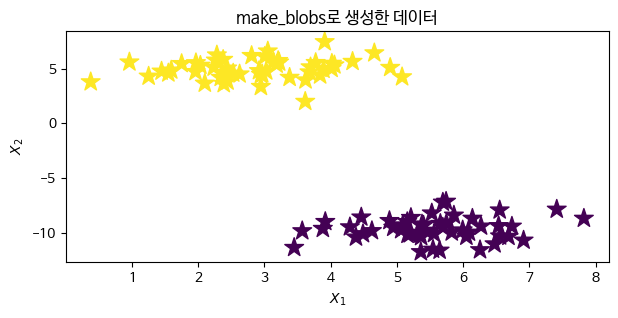

In [118]:
plt.figure(figsize = (7,3))
plt.scatter(X[:,0 ], X[:,1], marker = '*', c = y, s = 200)
plt.title('make_blobs로 생성한 데이터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

- n_samples와 n_features는 make_classification에서 사용되는 파라미터와 동일하다.
- centers는 생성 할 클러스터의 수, 기본값은 3

make_moons는 초승달 모양을 하고 2개의 클러스터를 가진 데이터를 생성해준다. 2차원 2진분류 데이터 셋이다.

In [119]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.2, random_state = 10)

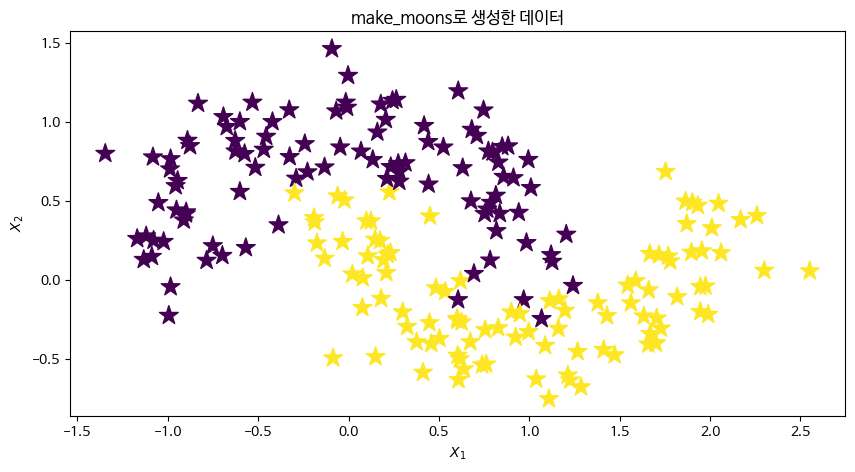

In [120]:
plt.figure(figsize = (10,5))
plt.scatter(X[:,0 ], X[:,1], marker = '*', c = y, s = 200)
plt.title('make_moons로 생성한 데이터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

  - noise : 잡음의 크기를 설정할 수 있으며, 0으로 설정하면 정확한 반원이 생성된다. 가우스 노이즈의 표준편차이다.
  - 직선을 사용하여 분리하는게 어렵다.

make_circles는 원 모양을 하는 2개의 클러스터를 가진 데이터를 생성해준다. 2차원 2진분류 데이터셋이다.

In [121]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 200, noise = 0.1, factor = 0.5)

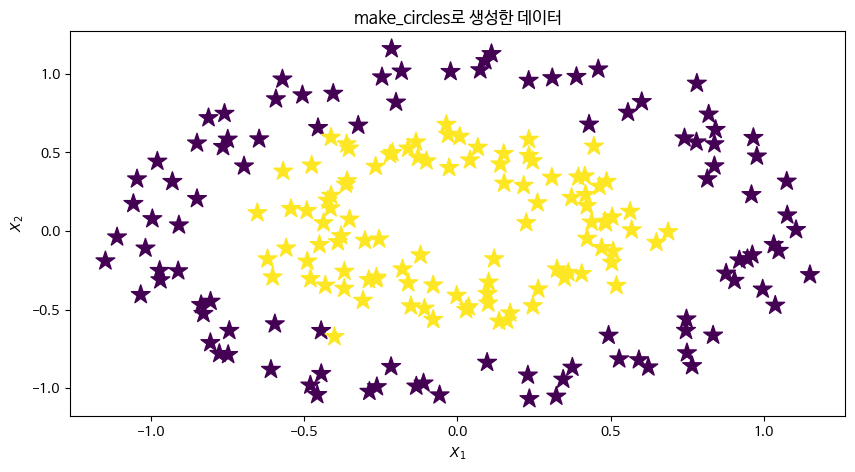

In [122]:
plt.figure(figsize = (10,5))
plt.scatter(X[:,0 ], X[:,1], marker = '*', c = y, s = 200)
plt.title('make_circles로 생성한 데이터')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

- factor : 안쪽 원과 바깥 쪽 원 사이의 비율을 조정할 수 있다.
- noise : 잡음의 크기를 설정할 수 있으며 0으로 설정하면 정확환 원의 형태를 띄게 된다.

In [123]:
from sklearn.datasets import load_wine

data_wine = load_wine()

In [124]:
data_wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [125]:
data_wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
print(data_wine.DESCR)

In [128]:
import pandas as pd

x_wine = pd.DataFrame(data_wine.data, columns=data_wine.feature_names)
x_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [130]:
data_wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [129]:
y_wine = pd.DataFrame(data_wine.target, columns=['target'])
y_wine.head()

,target
0,0
1,0
2,0
3,0
4,0


In [131]:
df_wine = pd.concat([x_wine, y_wine], axis=1)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.3)
X_train.shape, X_test.shape

((124, 13), (54, 13))

In [ ]:
X_train

In [134]:
model_softmax = LogisticRegression(multi_class='multinomial')
model_softmax

LogisticRegression(multi_class='multinomial')

In [135]:
model_softmax.fit(X_train, y_train)
model_softmax.score(X_test, y_test)

0.9444444444444444

In [136]:
model_ovr = LogisticRegression(multi_class='ovr')
model_ovr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [137]:
model_ovr.score(X_test, y_test)

0.9444444444444444